# IMPORT PACKAGE

In [ ]:
# import sparksession untuk proses transform
from pyspark.sql import SparkSession
# initialize spark session
spark = SparkSession.builder \
    .appName("WriteToPostgres") \
    .config("spark.jars.packages", "org.postgresql:postgresql:42.6.0") \
    .getOrCreate()
spark

In [ ]:
# import library
from pyspark.sql.functions import col
from pyspark.sql.functions import when, lit
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, FloatType, DateType

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np

# IMPORT DATA

In [ ]:
ta_raw = spark.read.csv('traffic_accidents.csv', header=True, inferSchema=True)
ta_raw.show()

+--------------------+----------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+----------------------+-------------+-----------------------+---------+--------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------+-----------------+-----------+
|          crash_date|traffic_control_device|weather_condition|  lighting_condition|    first_crash_type|     trafficway_type|         alignment|roadway_surface_cond|road_defect|          crash_type|intersection_related_i|       damage|prim_contributory_cause|num_units|  most_severe_injury|injuries_total|injuries_fatal|injuries_incapacitating|injuries_non_incapacitating|injuries_reported_not_evident|injuries_no_indication|crash_hour|crash_day_of_week|crash_month|
+--------------------+----------------------+-----------------+-

In [ ]:
ta_raw.printSchema()

root
 |-- crash_date: string (nullable = true)
 |-- traffic_control_device: string (nullable = true)
 |-- weather_condition: string (nullable = true)
 |-- lighting_condition: string (nullable = true)
 |-- first_crash_type: string (nullable = true)
 |-- trafficway_type: string (nullable = true)
 |-- alignment: string (nullable = true)
 |-- roadway_surface_cond: string (nullable = true)
 |-- road_defect: string (nullable = true)
 |-- crash_type: string (nullable = true)
 |-- intersection_related_i: string (nullable = true)
 |-- damage: string (nullable = true)
 |-- prim_contributory_cause: string (nullable = true)
 |-- num_units: integer (nullable = true)
 |-- most_severe_injury: string (nullable = true)
 |-- injuries_total: double (nullable = true)
 |-- injuries_fatal: double (nullable = true)
 |-- injuries_incapacitating: double (nullable = true)
 |-- injuries_non_incapacitating: double (nullable = true)
 |-- injuries_reported_not_evident: double (nullable = true)
 |-- injuries_no_indi

# DATA CLEANING

In [ ]:
ta_1 = ta_raw.withColumn("crash_date", F.to_timestamp(F.col("crash_date"), "MM/dd/yyyy hh:mm:ss a"))
ta_1.printSchema()

root
 |-- crash_date: timestamp (nullable = true)
 |-- traffic_control_device: string (nullable = true)
 |-- weather_condition: string (nullable = true)
 |-- lighting_condition: string (nullable = true)
 |-- first_crash_type: string (nullable = true)
 |-- trafficway_type: string (nullable = true)
 |-- alignment: string (nullable = true)
 |-- roadway_surface_cond: string (nullable = true)
 |-- road_defect: string (nullable = true)
 |-- crash_type: string (nullable = true)
 |-- intersection_related_i: string (nullable = true)
 |-- damage: string (nullable = true)
 |-- prim_contributory_cause: string (nullable = true)
 |-- num_units: integer (nullable = true)
 |-- most_severe_injury: string (nullable = true)
 |-- injuries_total: double (nullable = true)
 |-- injuries_fatal: double (nullable = true)
 |-- injuries_incapacitating: double (nullable = true)
 |-- injuries_non_incapacitating: double (nullable = true)
 |-- injuries_reported_not_evident: double (nullable = true)
 |-- injuries_no_i

In [ ]:
ta_1.show()

+-------------------+----------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+----------------------+-------------+-----------------------+---------+--------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------+-----------------+-----------+
|         crash_date|traffic_control_device|weather_condition|  lighting_condition|    first_crash_type|     trafficway_type|         alignment|roadway_surface_cond|road_defect|          crash_type|intersection_related_i|       damage|prim_contributory_cause|num_units|  most_severe_injury|injuries_total|injuries_fatal|injuries_incapacitating|injuries_non_incapacitating|injuries_reported_not_evident|injuries_no_indication|crash_hour|crash_day_of_week|crash_month|
+-------------------+----------------------+-----------------+----

In [ ]:
# Assuming 'ta_1' already has the 'crash_date' column as a timestamp
ta_2 = ta_1.withColumn("extracted_date", F.to_date(F.col("crash_date")))

ta_2.printSchema()
ta_2.show(5) # Show a few rows to see the new column

root
 |-- crash_date: timestamp (nullable = true)
 |-- traffic_control_device: string (nullable = true)
 |-- weather_condition: string (nullable = true)
 |-- lighting_condition: string (nullable = true)
 |-- first_crash_type: string (nullable = true)
 |-- trafficway_type: string (nullable = true)
 |-- alignment: string (nullable = true)
 |-- roadway_surface_cond: string (nullable = true)
 |-- road_defect: string (nullable = true)
 |-- crash_type: string (nullable = true)
 |-- intersection_related_i: string (nullable = true)
 |-- damage: string (nullable = true)
 |-- prim_contributory_cause: string (nullable = true)
 |-- num_units: integer (nullable = true)
 |-- most_severe_injury: string (nullable = true)
 |-- injuries_total: double (nullable = true)
 |-- injuries_fatal: double (nullable = true)
 |-- injuries_incapacitating: double (nullable = true)
 |-- injuries_non_incapacitating: double (nullable = true)
 |-- injuries_reported_not_evident: double (nullable = true)
 |-- injuries_no_i

# DATA ANALISIS

## Time Series Plot

In [ ]:
daily_counts = ta_2.groupBy("extracted_date").count().orderBy("extracted_date")
daily_counts_pd = daily_counts.toPandas() # Collect to Pandas for plotting

In [ ]:
monthly_counts = ta_2.withColumn("year_month", F.date_format(F.col("extracted_date"), "yyyy-MM")) \
                     .groupBy("year_month").count().orderBy("year_month")
monthly_counts_pd = monthly_counts.toPandas() # Collect to Pandas for plotting

In [ ]:
yearly_counts = ta_2.withColumn("year", F.year(F.col("extracted_date"))) \
                    .groupBy("year").count().orderBy("year")
yearly_counts_pd = yearly_counts.toPandas() # Collect to Pandas for plotting

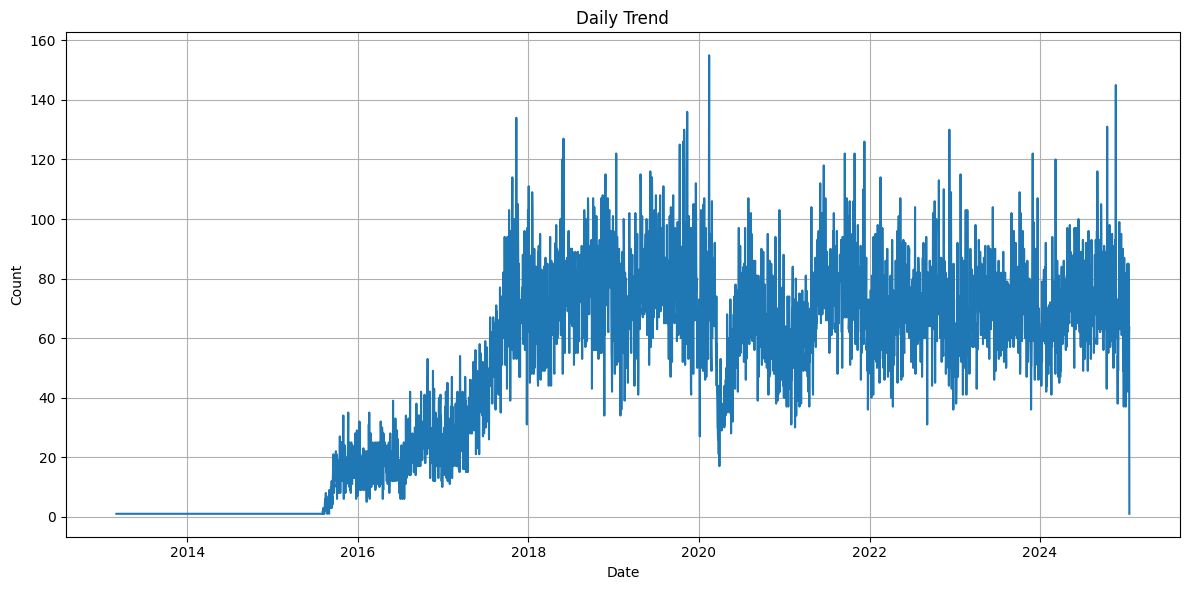

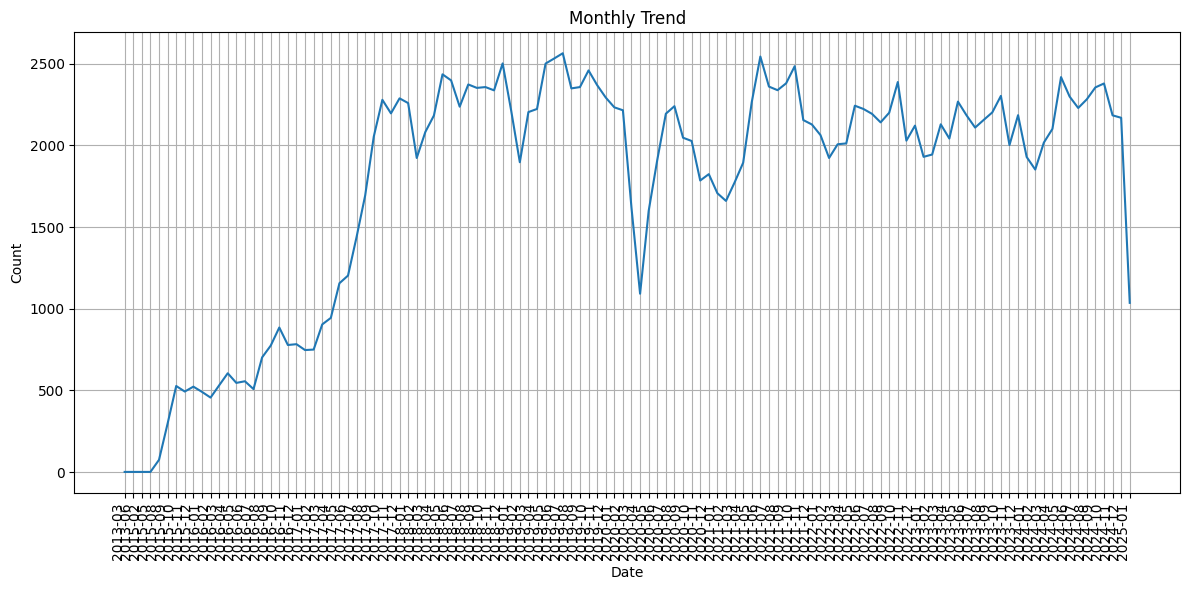

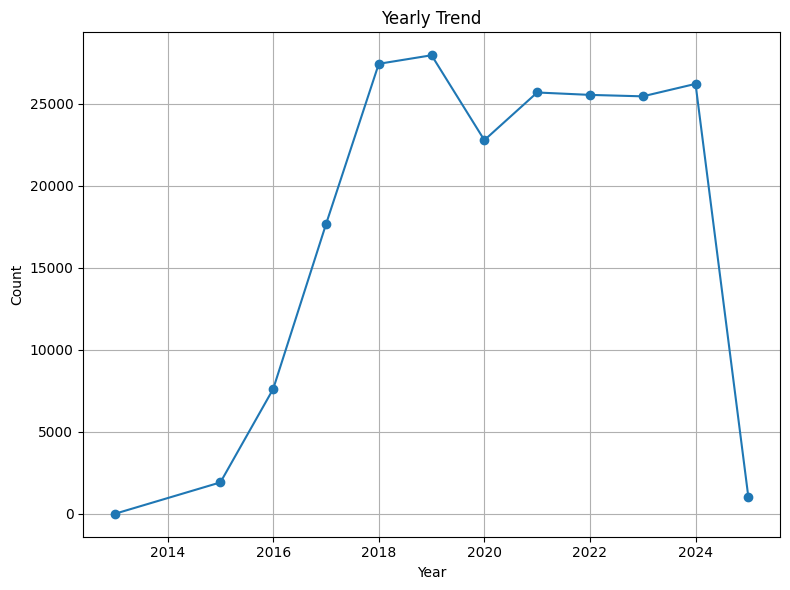

In [ ]:
import matplotlib.pyplot as plt

# Daily Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_counts_pd["extracted_date"], daily_counts_pd["count"])
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Daily Trend")
plt.grid(True)
plt.tight_layout()
plt.show()

# Monthly Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts_pd["year_month"], monthly_counts_pd["count"])
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Monthly Trend")
plt.xticks(rotation=90, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Yearly Plot
plt.figure(figsize=(8, 6))
plt.plot(yearly_counts_pd["year"], yearly_counts_pd["count"], marker='o')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Yearly Trend")
plt.grid(True)
plt.tight_layout()
plt.show()

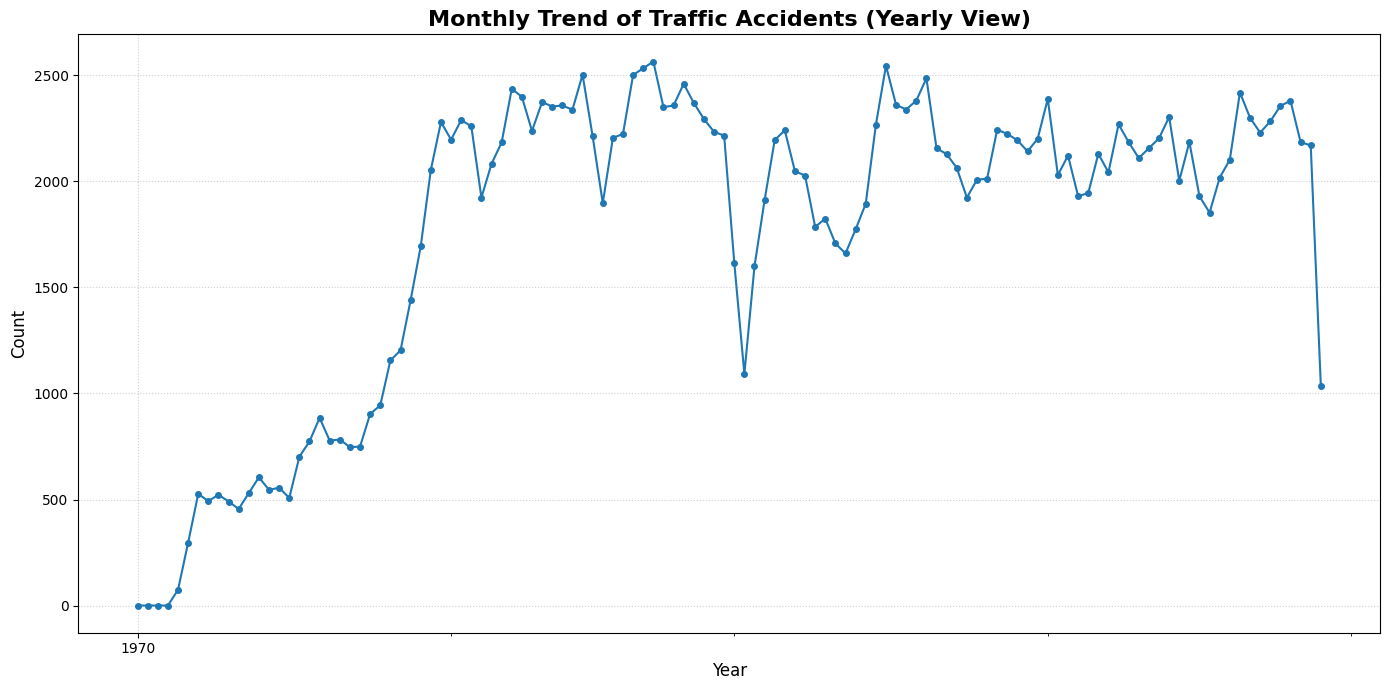

In [ ]:
# --- Monthly Plot ---
fig, ax = plt.subplots(figsize=(14, 7)) # Generous figure size

ax.plot(monthly_counts_pd["year_month"], monthly_counts_pd["count"], marker='o', markersize=4, linestyle='-') # Added marker for clarity
ax.set_xlabel("Year", fontsize=12) # Changed label to 'Year'
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Monthly Trend of Traffic Accidents (Yearly View)", fontsize=16, fontweight='bold')

# --- FIX: Show only years on the X-axis ---

# Set major ticks to appear at the beginning of each year
ax.xaxis.set_major_locator(mdates.YearLocator())

# Format the major tick labels to show only the full year (e.g., '2022', '2023')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Optional: Add minor ticks for every month (without labels) for underlying detail
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))


# Add a light grid for readability
ax.grid(True, alpha=0.6, linestyle=':')

# No rotation needed for years, as they are typically short enough
# plt.xticks(rotation=0) # You can explicitly set rotation to 0 if desired

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

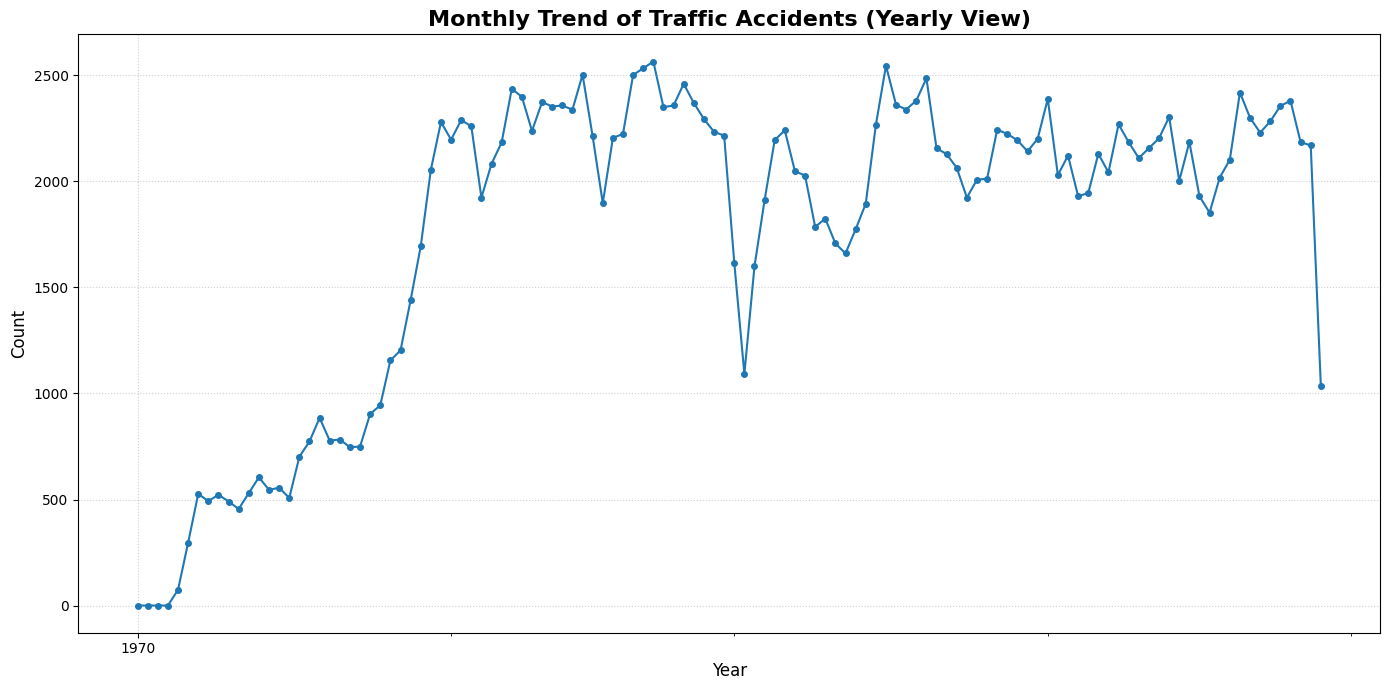

In [ ]:
# --- Monthly Plot ---
fig, ax = plt.subplots(figsize=(14, 7)) # Generous figure size

ax.plot(monthly_counts_pd["year_month"], monthly_counts_pd["count"], marker='o', markersize=4, linestyle='-')
ax.set_xlabel("Year", fontsize=12) # Changed label to 'Year'
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Monthly Trend of Traffic Accidents (Yearly View)", fontsize=16, fontweight='bold')

# --- FIX: Ensure proper year display ---

# Set major ticks to appear at the beginning of each year
ax.xaxis.set_major_locator(mdates.YearLocator())

# Format the major tick labels to show only the full year (e.g., '2022', '2023')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Optional: Add minor ticks for every month (without labels) for underlying detail
# This helps if you want to see the monthly progression between year labels.
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))


# Add a light grid for readability
ax.grid(True, alpha=0.6, linestyle=':')

# No rotation needed for years, as they are typically short enough
# plt.xticks(rotation=0) # Explicitly set rotation to 0 if desired

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Persentase Korban Kecelakaan

In [ ]:
# 1. Calculate individual sums for each injury type
total_injuries_fatal = ta_2.agg(F.sum('injuries_fatal')).collect()[0][0]
total_injuries_incapacitating = ta_2.agg(F.sum('injuries_incapacitating')).collect()[0][0]
total_injuries_non_incapacitating = ta_2.agg(F.sum('injuries_non_incapacitating')).collect()[0][0]
total_injuries_reported_not_evident = ta_2.agg(F.sum('injuries_reported_not_evident')).collect()[0][0]
total_injuries_no_indication = ta_2.agg(F.sum('injuries_no_indication')).collect()[0][0]

# 2. Calculate total_injuries using a list for sum()
total_injuries = sum([
    total_injuries_fatal,
    total_injuries_incapacitating,
    total_injuries_non_incapacitating,
    total_injuries_reported_not_evident,
    total_injuries_no_indication
])

# Add a check to prevent division by zero if total_injuries is 0
if total_injuries == 0:
    print("Warning: Total injuries is zero, percentages cannot be calculated.")
    percentage_injuries_fatal = 0.0
    percentage_injuries_incapacitating = 0.0
    percentage_injuries_non_incapacitating = 0.0
    percentage_injuries_reported_not_evident = 0.0
    percentage_injuries_no_indication = 0.0
else:
    # 3. Calculate percentages correctly (remove the '%' symbol from the calculation)
    percentage_injuries_fatal = (total_injuries_fatal / total_injuries) * 100
    percentage_injuries_incapacitating = (total_injuries_incapacitating / total_injuries) * 100
    percentage_injuries_non_incapacitating = (total_injuries_non_incapacitating / total_injuries) * 100
    percentage_injuries_reported_not_evident = (total_injuries_reported_not_evident / total_injuries) * 100
    percentage_injuries_no_indication = (total_injuries_no_indication / total_injuries) * 100 # Corrected typo here

# Print the results to verify
print(f"Total Fatal Injuries: {total_injuries_fatal}")
print(f"Total Incapacitating Injuries: {total_injuries_incapacitating}")
print(f"Total Non-Incapacitating Injuries: {total_injuries_non_incapacitating}")
print(f"Total Reported Not Evident Injuries: {total_injuries_reported_not_evident}")
print(f"Total No Indication Injuries: {total_injuries_no_indication}")
print(f"Overall Total Injuries: {total_injuries}")
print(f"Percentage Fatal Injuries: {percentage_injuries_fatal:.2f}%")
print(f"Percentage Incapacitating Injuries: {percentage_injuries_incapacitating:.2f}%")
print(f"Percentage Non-Incapacitating Injuries: {percentage_injuries_non_incapacitating:.2f}%")
print(f"Percentage Reported Not Evident Injuries: {percentage_injuries_reported_not_evident:.2f}%")
print(f"Percentage No Indication Injuries: {percentage_injuries_no_indication:.2f}%")




Total Fatal Injuries: 389.0
Total Incapacitating Injuries: 7975.0
Total Non-Incapacitating Injuries: 46307.0
Total Reported Not Evident Injuries: 25434.0
Total No Indication Injuries: 469683.0
Overall Total Injuries: 549788.0
Percentage Fatal Injuries: 0.07%
Percentage Incapacitating Injuries: 1.45%
Percentage Non-Incapacitating Injuries: 8.42%
Percentage Reported Not Evident Injuries: 4.63%
Percentage No Indication Injuries: 85.43%


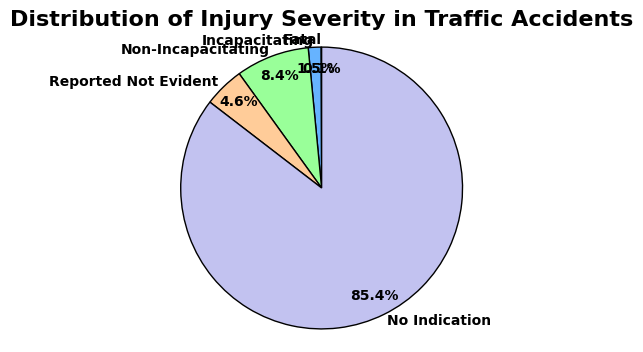

In [ ]:
labels = [
    'Fatal',
    'Incapacitating',
    'Non-Incapacitating',
    'Reported Not Evident',
    'No Indication'
]

sizes = [
    percentage_injuries_fatal,
    percentage_injuries_incapacitating,
    percentage_injuries_non_incapacitating,
    percentage_injuries_reported_not_evident,
    percentage_injuries_no_indication
]

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

fig1, ax1 = plt.subplots(figsize=(4, 4)) # Increased figure size

wedges, texts, autotexts = ax1.pie(sizes,
                                   labels=labels,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   colors=colors,
                                   pctdistance=0.85,  # Percentage labels closer to center
                                   labeldistance=1.05, # Labels slightly further out (default is 1.1)
                                   wedgeprops={'edgecolor': 'black'})

# Customize percentage text
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

# Customize label text
for text in texts:
    text.set_fontsize(10)
    text.set_fontweight('bold')

ax1.axis('equal')
plt.title('Distribution of Injury Severity in Traffic Accidents', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
# 1. Calculate individual sums for each injury type
total_injuries_fatal = ta_2.agg(F.sum('injuries_fatal')).collect()[0][0]
total_injuries_incapacitating = ta_2.agg(F.sum('injuries_incapacitating')).collect()[0][0]
total_injuries_non_incapacitating = ta_2.agg(F.sum('injuries_non_incapacitating')).collect()[0][0]
total_injuries_reported_not_evident = ta_2.agg(F.sum('injuries_reported_not_evident')).collect()[0][0]

# 2. Calculate total_injuries using a list for sum()
total_injuries2 = sum([
    total_injuries_fatal,
    total_injuries_incapacitating,
    total_injuries_non_incapacitating,
    total_injuries_reported_not_evident,
])

# Add a check to prevent division by zero if total_injuries is 0
if total_injuries2 == 0:
    print("Warning: Total injuries is zero, percentages cannot be calculated.")
    percentage_injuries_fatal2 = 0.0
    percentage_injuries_incapacitating2 = 0.0
    percentage_injuries_non_incapacitating2 = 0.0
    percentage_injuries_reported_not_evident2 = 0.0
else:
    # 3. Calculate percentages correctly (remove the '%' symbol from the calculation)
    percentage_injuries_fatal2 = (total_injuries_fatal / total_injuries) * 100
    percentage_injuries_incapacitating2 = (total_injuries_incapacitating / total_injuries) * 100
    percentage_injuries_non_incapacitating2 = (total_injuries_non_incapacitating / total_injuries) * 100
    percentage_injuries_reported_not_evident2 = (total_injuries_reported_not_evident / total_injuries) * 100

# Print the results to verify
print(f"Total Fatal Injuries: {total_injuries_fatal}")
print(f"Total Incapacitating Injuries: {total_injuries_incapacitating}")
print(f"Total Non-Incapacitating Injuries: {total_injuries_non_incapacitating}")
print(f"Total Reported Not Evident Injuries: {total_injuries_reported_not_evident}")
print(f"Overall Total Injuries: {total_injuries}")
print(f"Percentage Fatal Injuries: {percentage_injuries_fatal:.2f}%")
print(f"Percentage Incapacitating Injuries: {percentage_injuries_incapacitating:.2f}%")
print(f"Percentage Non-Incapacitating Injuries: {percentage_injuries_non_incapacitating:.2f}%")
print(f"Percentage Reported Not Evident Injuries: {percentage_injuries_reported_not_evident:.2f}%")



Total Fatal Injuries: 389.0
Total Incapacitating Injuries: 7975.0
Total Non-Incapacitating Injuries: 46307.0
Total Reported Not Evident Injuries: 25434.0
Overall Total Injuries: 549788.0
Percentage Fatal Injuries: 0.07%
Percentage Incapacitating Injuries: 1.45%
Percentage Non-Incapacitating Injuries: 8.42%
Percentage Reported Not Evident Injuries: 4.63%


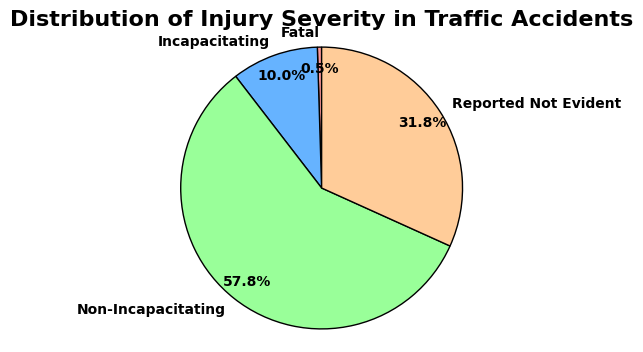

In [ ]:
# --- Prepare data for the pie chart ---
labels = [
    'Fatal',
    'Incapacitating',
    'Non-Incapacitating',
    'Reported Not Evident',
]

sizes = [
    percentage_injuries_fatal2,
    percentage_injuries_incapacitating2,
    percentage_injuries_non_incapacitating2,
    percentage_injuries_reported_not_evident2,
]

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'] # Custom colors for better aesthetics

# --- Create the Pie Chart ---
fig1, ax1 = plt.subplots(figsize=(4, 4)) # Set figure size for better readability

# Plotting the pie chart
wedges, texts, autotexts = ax1.pie(sizes,
                                   labels=labels,
                                   autopct='%1.1f%%', # Format for showing percentage on slices
                                   startangle=90,     # Start the first slice (Fatal) at the top
                                   colors=colors,
                                   pctdistance=0.85,  # Distance of percentage labels from the center
                                   wedgeprops={'edgecolor': 'black'}) # Add black edges to slices

# Draw a circle in the center to make it a donut chart (optional, but often looks good)
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)


# Customize the text for percentages
for autotext in autotexts:
    autotext.set_color('black') # Make percentage text black
    autotext.set_fontsize(10)   # Adjust font size
    autotext.set_fontweight('bold') # Make text bold

# Customize the text for labels (optional)
for text in texts:
    text.set_fontsize(10)
    text.set_fontweight('bold')

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Injury Severity in Traffic Accidents', fontsize=16, fontweight='bold')
plt.show()

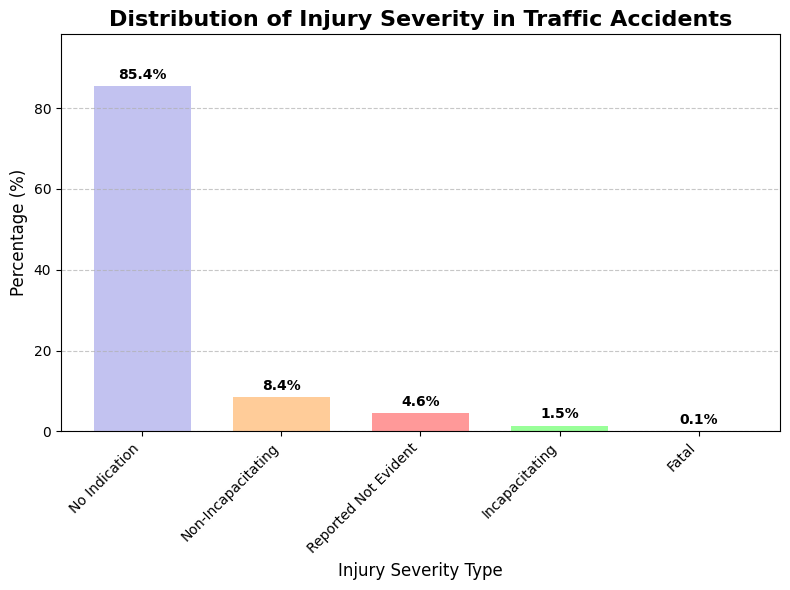

In [ ]:
# Prepare data for the bar chart
labels = [
    'Fatal',
    'Incapacitating',
    'Non-Incapacitating',
    'Reported Not Evident',
    'No Indication'
]

percentages = [
    percentage_injuries_fatal,
    percentage_injuries_incapacitating,
    percentage_injuries_non_incapacitating,
    percentage_injuries_reported_not_evident,
    percentage_injuries_no_indication
]

# Sort the data by percentage in descending order for better visualization
# This makes it easier to see the most common injury types first.
sorted_indices = np.argsort(percentages)[::-1] # Get indices to sort in descending order
labels_sorted = [labels[i] for i in sorted_indices]
percentages_sorted = [percentages[i] for i in sorted_indices]

colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0'] # Custom colors
# If you sorted, you might want to reorder colors too, or just use a colormap
colors_sorted = [colors[i] for i in sorted_indices]


# --- Create the Bar Chart ---
fig, ax = plt.subplots(figsize=(8, 6)) # Adjust figure size as needed

# Create the bars
bars = ax.bar(labels_sorted, percentages_sorted, color=colors_sorted, width=0.7)

# Add title and labels
ax.set_title('Distribution of Injury Severity in Traffic Accidents', fontsize=16, fontweight='bold')
ax.set_xlabel('Injury Severity Type', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)

# Set y-axis limits to start from 0 and go slightly above 100 for spacing
ax.set_ylim(0, max(percentages_sorted) * 1.15) # Adjust max to leave some space for labels

# Add percentage labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, # Position slightly above the bar
            f'{yval:.1f}%', # Format to one decimal place
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Rotate x-axis labels if they are long or overlapping
plt.xticks(rotation=45, ha='right') # Rotate labels and align them to the right

# Add a grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout() # Adjust layout to prevent labels from overlapping the plot area
plt.show()

## Kerugian Akibat Kecelakaan

<ipython-input-19-659cb73cea7a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=damage_pd, x="crash_count", y="damage", ax=ax, palette="viridis")


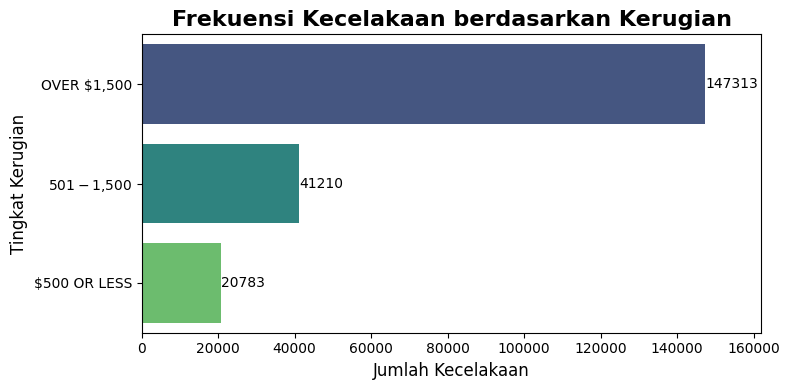

In [ ]:
# Aggregate damage data using PySpark
damage = ta_2.groupBy("damage").agg(F.count("*").alias("crash_count")).orderBy(F.desc("crash_count"))

# Convert PySpark DataFrame to Pandas DataFrame for Seaborn plotting
damage_pd = damage.toPandas()

# Create a single figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 4)) # Adjust figsize as needed

# Create the bar plot
sns.barplot(data=damage_pd, x="crash_count", y="damage", ax=ax, palette="viridis")

# Set titles and labels
ax.set_title("Frekuensi Kecelakaan berdasarkan Kerugian", fontsize=16, fontweight='bold')
ax.set_xlabel("Jumlah Kecelakaan", fontsize=12) # More descriptive label
ax.set_ylabel("Tingkat Kerugian", fontsize=12)

# Optional: Add value labels on the bars for clarity
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, # Adjust 5 for spacing
            p.get_y() + p.get_height() / 2,
            f'{int(width)}', # Display integer count
            ha='left', va='center', fontsize=10)

# Adjust x-axis limits to accommodate labels if needed
ax.set_xlim(0, damage_pd['crash_count'].max() * 1.1)


plt.tight_layout() # Ensures everything fits
plt.show()

## waktu paling rawan kecekalaan

+----------+-----+
|crash_hour|count|
+----------+-----+
|        17|16097|
|        16|16025|
|        15|15894|
+----------+-----+



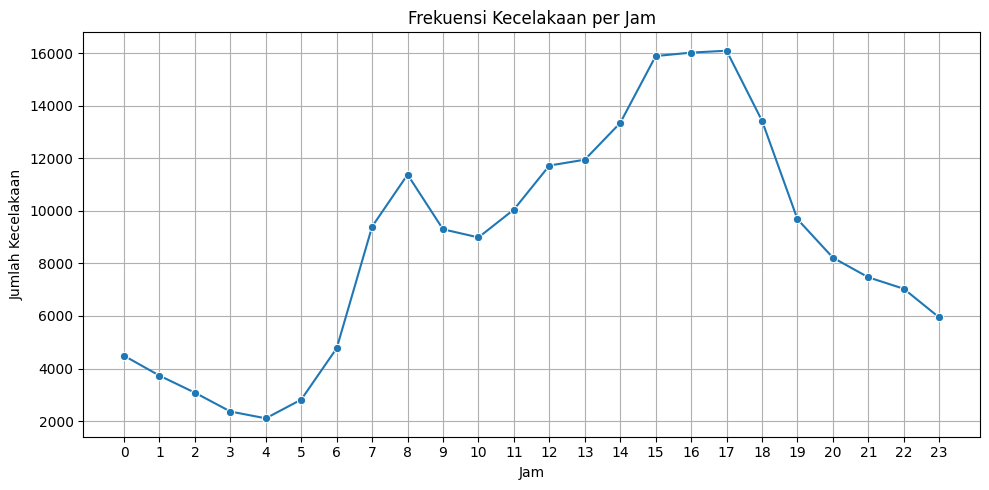

In [ ]:
# Jumlah kecelakaan per jam
crash_time = ta_2.groupBy("crash_hour").agg(F.count("*").alias("count"))

# 3 jam dengan kecelakaan tertinggi
top3_hours = crash_time.orderBy(F.desc("count")).limit(3)
top3_hours.show()


crash_time_pd = crash_time.toPandas()
top3_pd = top3_hours.toPandas()

# Visualisasi
plt.figure(figsize=(10,5))
sns.lineplot(data=crash_time_pd.sort_values("crash_hour"), x="crash_hour", y="count", marker="o")
plt.title("Frekuensi Kecelakaan per Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Kecelakaan")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

+-----------------+-----+
|crash_day_of_week|count|
+-----------------+-----+
|                6|34458|
|                5|30787|
|                7|30710|
+-----------------+-----+



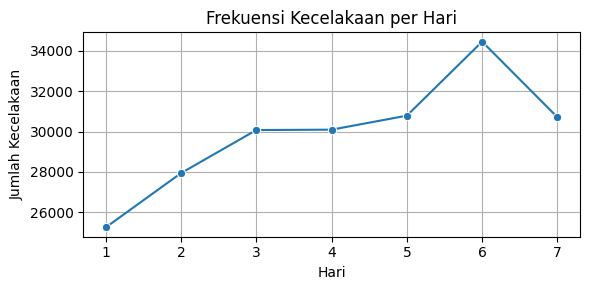

In [ ]:
# Jumlah kecelakaan per jam
crash_day = ta_2.groupBy("crash_day_of_week").agg(F.count("*").alias("count"))

# 3 jam dengan kecelakaan tertinggi
top3_day = crash_day.orderBy(F.desc("count")).limit(3)
top3_day.show()


crash_day_pd = crash_day.toPandas()
top3day_pd = top3_day.toPandas()

# Visualisasi
plt.figure(figsize=(6,3))
sns.lineplot(data=crash_day_pd.sort_values("crash_day_of_week"), x="crash_day_of_week", y="count", marker="o")
plt.title("Frekuensi Kecelakaan per Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Kecelakaan")
plt.grid(True)
plt.xticks(range(1, 8))
plt.tight_layout()
plt.show()

Top 3 hari dengan kecelakaan tertinggi:
+-----------------+-----+
|crash_day_of_week|count|
+-----------------+-----+
|                6|34458|
|                5|30787|
|                7|30710|
+-----------------+-----+



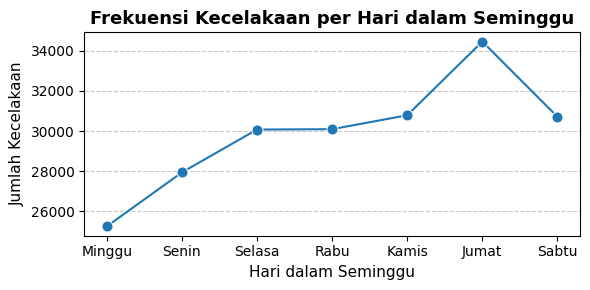

In [ ]:
# Assume 'spark' context and 'ta_2' DataFrame are already defined

# 1. Aggregate crash counts by day of the week
#    Ensure "crash_day_of_week" column exists in ta_2.
#    It's common for this to be 1=Sunday, 2=Monday, ..., 7=Saturday, but confirm your data's mapping.
crash_day = ta_2.groupBy("crash_day_of_week").agg(F.count("*").alias("count"))

# 2. Get top 3 days (for specific analysis, not directly used in the plot below)
top3_day = crash_day.orderBy(F.desc("count")).limit(3)
print("Top 3 hari dengan kecelakaan tertinggi:")
top3_day.show() # Using show() for PySpark DataFrame output

# 3. Convert PySpark DataFrame to Pandas DataFrame for plotting
#    Crucially, order by the numeric day of week BEFORE converting to Pandas
#    to ensure the days are plotted in correct chronological order.
crash_day_pd = crash_day.orderBy("crash_day_of_week").toPandas()

# 4. Map numeric day of week to names
#    This dictionary defines the mapping from number to Indonesian day name.
#    Adjust if your day-of-week numbering starts differently (e.g., 0=Monday).
day_name_map = {
    1: 'Minggu',  # Sunday
    2: 'Senin',   # Monday
    3: 'Selasa',  # Tuesday
    4: 'Rabu',    # Wednesday
    5: 'Kamis',   # Thursday
    6: 'Jumat',   # Friday
    7: 'Sabtu'    # Saturday
}

# Create a new column with day names
crash_day_pd['day_name'] = crash_day_pd['crash_day_of_week'].map(day_name_map)

# 5. Visualisasi menggunakan Line Plot (as requested, though bar is often clearer for categories)
plt.figure(figsize=(6, 3)) # Increased figure size for better readability

# Use the newly created 'day_name' column for the x-axis
sns.lineplot(data=crash_day_pd, x="day_name", y="count", marker="o", linestyle='-', markersize=8)

plt.title("Frekuensi Kecelakaan per Hari dalam Seminggu", fontsize=13, fontweight='bold')
plt.xlabel("Hari dalam Seminggu", fontsize=11) # Corrected label to reflect 'Hari'
plt.ylabel("Jumlah Kecelakaan", fontsize=11)

# Ensure all day names are visible on the x-axis
# No need for plt.xticks(range(1, 8)) because we're using categorical labels now.
# Rotation is usually not needed for 7 short day names but can be added if they overlap.
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7) # Grid only on Y-axis, lighter
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Berdasarkan grafik frekuensi kecelakaan per jam, waktu paling rawan terjadi kecelakaan lalu lintas adalah pada sore hari, khususnya pukul 15.00 hingga 17.00. Pada rentang waktu tersebut, jumlah kecelakaan mencapai puncaknya, dengan angka tertinggi terjadi pada pukul 17.00 sebanyak 10.229 kejadian. Pola ini menunjukkan bahwa jam-jam pulang kerja dan sekolah berkontribusi besar terhadap peningkatan risiko kecelakaan, kemungkinan akibat tingginya volume kendaraan, kelelahan pengendara, dan kepadatan lalu lintas. Oleh karena itu, periode sore hari merupakan waktu yang paling kritis dan perlu mendapat perhatian khusus dalam upaya pencegahan kecelakaan.

**Rekomendasi**

**1. Manajemen Lalu Lintas yang Lebih Baik di Jam Pulang Kerja/Sekolah**
*   Tambahkan petugas lalu lintas atau polisi di titik-titik rawan kemacetan.
*   Optimalkan waktu lampu lalu lintas (traffic light) agar disesuaikan dengan arus kendaraan di jam sibuk.
*   Gunakan sistem ATCS (Area Traffic Control System) atau pengaturan lampu hijau bergiliran secara cerdas.

**2. Sosialisasi Risiko Jam Sibuk kepada Pengendara**


*   Edukasi melalui media sosial, spanduk, dan radio lokal bahwa pukul 15.00–17.00 adalah jam rawan kecelakaan.
*   Dorong masyarakat untuk Tidak terburu-buru, Istirahat sebentar sebelum berkendara pulang, Menghindari distraksi (seperti HP) saat mengemudi

**3. Pembatasan atau Pengaturan Khusus untuk Kendaraan Besar**
*   Terapkan jam larangan melintas bagi truk besar dan kendaraan berat di jalan kota pada pukul 15.00–18.00.
*   Berikan jalur alternatif bagi kendaraan logistik di luar jam sibuk.

**4. Pengaturan Waktu Pulang Sekolah dan Kantor yang Lebih Fleksibel**
*   Dorong perusahaan dan instansi untuk shift kerja fleksibel atau sistem pulang bergilir.
*   Sekolah bisa mengatur jam pulang bertahap berdasarkan jenjang pendidikan.

**5. Kampanye Keselamatan Berkendara di Jam Padat**
*   Fokuskan kampanye pada faktor, Kelelahan pengendara, Kesabaran dalam kemacetan, Pentingnya jarak aman antar kendaraan



## Primary contributory cause terbanyak


<ipython-input-23-ce85cf28b0f2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fatal_by_cause_pd.head(15), y="prim_contributory_cause", x="total_fatalities", palette="Reds_r")


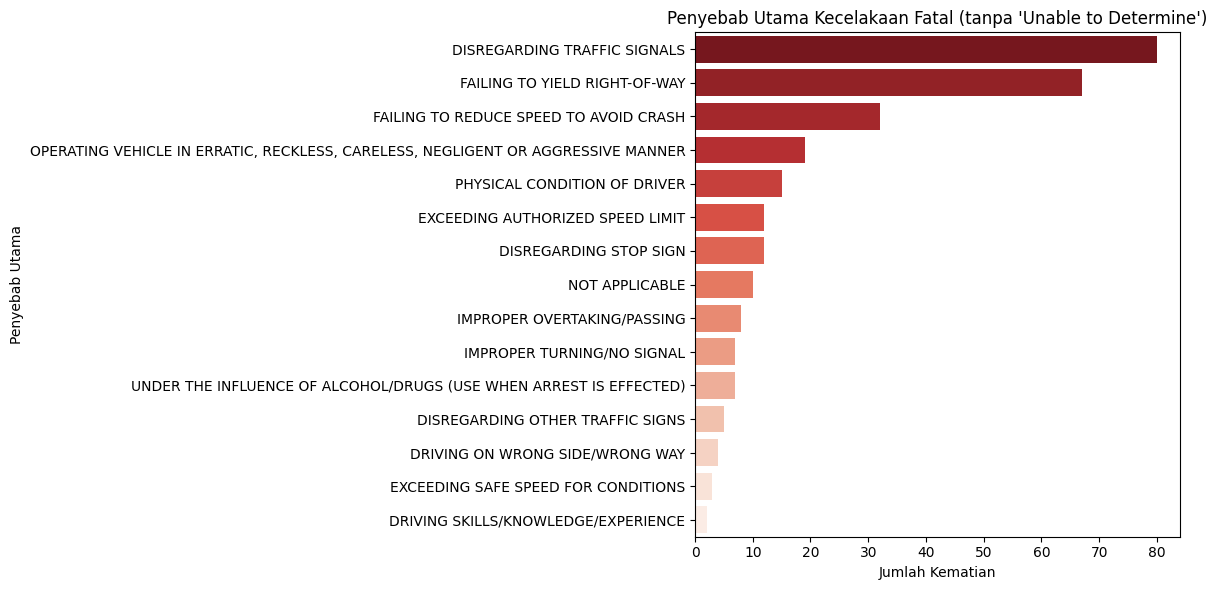

In [ ]:
# Filter nilai yang valid (bukan "Unable to Determine")
ta_2_filtered = ta_2.filter(F.col("prim_contributory_cause") != "UNABLE TO DETERMINE")

# Hitung jumlah kematian berdasarkan penyebab utama
fatal_by_cause = ta_2_filtered.groupBy("prim_contributory_cause") \
    .agg(F.sum("injuries_fatal").alias("total_fatalities")) \
    .orderBy(F.desc("total_fatalities"))

# Konversi ke pandas untuk visualisasi
fatal_by_cause_pd = fatal_by_cause.toPandas()

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=fatal_by_cause_pd.head(15), y="prim_contributory_cause", x="total_fatalities", palette="Reds_r")
plt.title("Penyebab Utama Kecelakaan Fatal (tanpa 'Unable to Determine')")
plt.xlabel("Jumlah Kematian")
plt.ylabel("Penyebab Utama")
plt.tight_layout()
plt.show()

In [ ]:
# UJI T-TEST

from pyspark.sql.functions import col
from scipy.stats import ttest_ind

# Filter dua penyebab utama dan hanya yang memiliki data fatalities
t_test_df = ta_2.filter(
    (col("prim_contributory_cause").isin(["DISREGARDING TRAFFIC SIGNALS", "FAILING TO YIELD RIGHT-OF-WAY"])) &
    (col("injuries_fatal").isNotNull())
).select("prim_contributory_cause", "injuries_fatal")

# Konversi ke pandas
t_test_pd = t_test_df.toPandas()

# Bagi ke dalam dua grup berdasarkan penyebab
group_signal = t_test_pd[t_test_pd["prim_contributory_cause"] == "DISREGARDING TRAFFIC SIGNALS"]["injuries_fatal"]
group_yield = t_test_pd[t_test_pd["prim_contributory_cause"] == "FAILING TO YIELD RIGHT-OF-WAY"]["injuries_fatal"]

# Hitung rata-rata
mean_signal = group_signal.mean()
mean_yield = group_yield.mean()

# T-Test
t_stat, p_val = ttest_ind(group_signal, group_yield, equal_var=False)

print("=== Two Sample T-Test ===")
print("DISREGARDING TRAFFIC SIGNALS - Mean:", round(mean_signal, 3))
print("FAILING TO YIELD RIGHT-OF-WAY - Mean:", round(mean_yield, 3))
print("T-statistic:", round(t_stat, 4))
print("P-value:", round(p_val, 4))

if p_val < 0.05:
    print("Hasil signifikan: Ada perbedaan rata-rata fatalities antara dua penyebab tersebut.")
else:
    print("Hasil tidak signifikan: Tidak ada perbedaan rata-rata fatalities antara dua penyebab tersebut.")

=== Two Sample T-Test ===
DISREGARDING TRAFFIC SIGNALS - Mean: 0.005
FAILING TO YIELD RIGHT-OF-WAY - Mean: 0.002
T-statistic: 5.4673
P-value: 0.0
Hasil signifikan: Ada perbedaan rata-rata fatalities antara dua penyebab tersebut.


Hasil nilai P-value <0,05 artinya perbedaan jumlah kematian antara dua penyebab signifikan secara statistik. Sehingga dapat disimpulkan bahwa faktor utama yang mempengaruhi jumlah kecelakaan parah adalah "DISREGARDING TRAFFIC SIGNALS"

**Rekomendasi**

1. Penguatan Pengawasan Lampu Lalu Lintas
Pasang kamera pengawas (CCTV atau kamera tilang otomatis) di persimpangan lampu merah berisiko tinggi.

2. Kampanye Edukasi Khusus: "1 Detik Bisa Mematikan"
Fokus pada konsekuensi fatal dari menerobos lampu merah.

3. Peningkatan Sanksi Hukum
Usulkan denda lebih tinggi dan sanksi tilang langsung untuk pelanggaran lampu merah. Terapkan point system SIM, di mana pelanggaran lampu lalu lintas menyumbang poin besar.

4. Analisis Persimpangan Rawan untuk Intervensi Khusus
Fokuskan intervensi pada lokasi dengan rekam jejak pelanggaran lampu lalu lintas tinggi dan jumlah kematian yang besar. Bisa dilakukan Perpanjangan durasi lampu kuning

5. Penegakan Hukum Secara Acak (Random Enforcement)
Lakukan operasi gabungan secara tidak terjadwal dan acak di berbagai persimpangan, terutama jam rawan.


## first crash type yg paling banyak

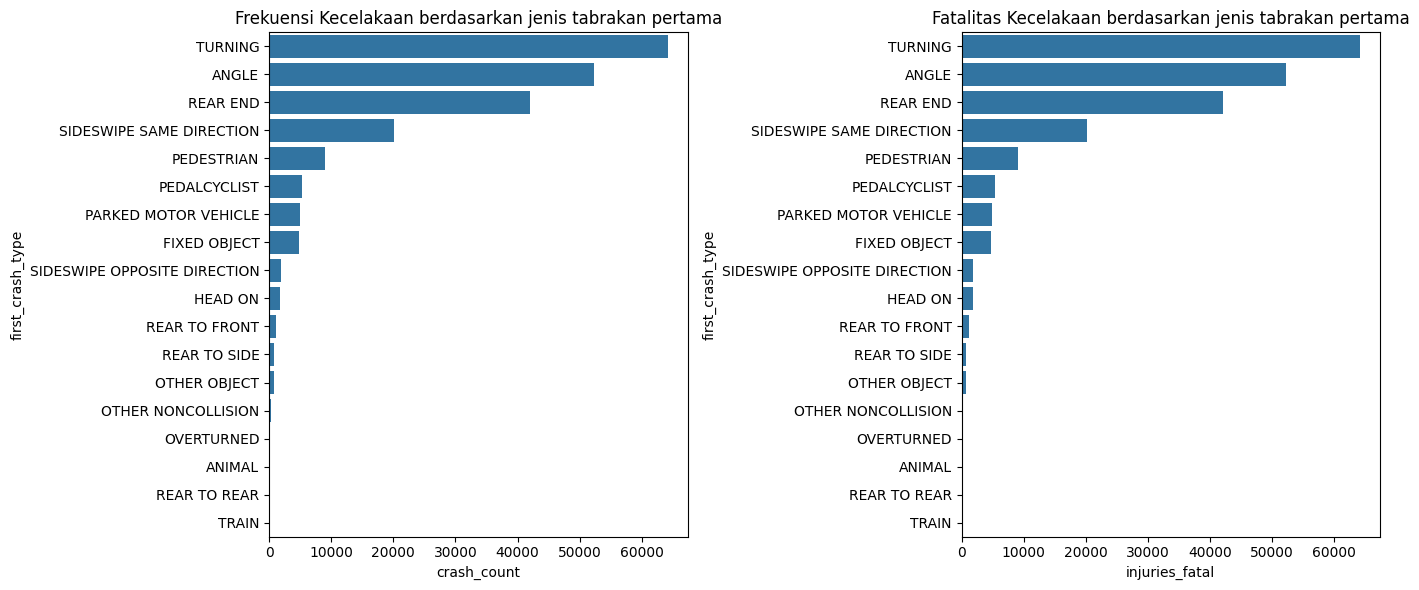

In [ ]:
# fct vs crash count
fct_count = ta_2.groupBy("first_crash_type").agg(F.count("*").alias("crash_count")).orderBy(F.desc("crash_count"))

# fct vs fatal count
fct_fatal = ta_2.groupBy("first_crash_type").agg(F.count("*").alias("injuries_fatal")).orderBy(F.desc("injuries_fatal"))

# Visualisasi
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(data=fct_count.toPandas(), x="crash_count", y="first_crash_type", ax=ax[0])
ax[0].set_title("Frekuensi Kecelakaan berdasarkan jenis tabrakan pertama")

sns.barplot(data=fct_fatal.toPandas(), x="injuries_fatal", y="first_crash_type", ax=ax[1])
ax[1].set_title("Fatalitas Kecelakaan berdasarkan jenis tabrakan pertama")
plt.tight_layout()
plt.show()

In [ ]:
# Tampilkan tabel frekuensi kecelakaan:
fct_count = ta_2.groupBy("first_crash_type") \
    .agg(F.count("*").alias("crash_count")) \
    .orderBy(F.desc("crash_count"))

fct_count.show(truncate=False)


+----------------------------+-----------+
|first_crash_type            |crash_count|
+----------------------------+-----------+
|TURNING                     |64157      |
|ANGLE                       |52250      |
|REAR END                    |42018      |
|SIDESWIPE SAME DIRECTION    |20116      |
|PEDESTRIAN                  |8996       |
|PEDALCYCLIST                |5337       |
|PARKED MOTOR VEHICLE        |4893       |
|FIXED OBJECT                |4742       |
|SIDESWIPE OPPOSITE DIRECTION|1839       |
|HEAD ON                     |1790       |
|REAR TO FRONT               |1157       |
|REAR TO SIDE                |773        |
|OTHER OBJECT                |759        |
|OTHER NONCOLLISION          |249        |
|OVERTURNED                  |96         |
|ANIMAL                      |77         |
|REAR TO REAR                |49         |
|TRAIN                       |8          |
+----------------------------+-----------+



Sebagian besar kecelakaan terjadi saat:
*   Belok (TURNING): Mungkin karena kurang hati-hati saat menyilang jalan.
*   Tabrakan Sudut (ANGLE): Sering terjadi di persimpangan jalan.
*   Tabrak Belakang (REAR END): Kemungkinan karena kurang jaga jarak aman.
*   Gesekan Searah (SIDESWIPE SAME DIRECTION): Sering terjadi di jalan padat.
*   Pejalan Kaki (PEDESTRIAN) juga cukup sering terlibat kecelakaan.













In [ ]:
# # Tampilkan tabel fatalitas kecelakaan:
fct_fatal = ta_2.groupBy("first_crash_type") \
    .agg(F.sum("injuries_fatal").alias("injuries_fatal")) \
    .orderBy(F.desc("injuries_fatal"))

fct_fatal.show(truncate=False)


+----------------------------+--------------+
|first_crash_type            |injuries_fatal|
+----------------------------+--------------+
|ANGLE                       |123.0         |
|PEDESTRIAN                  |95.0          |
|TURNING                     |75.0          |
|FIXED OBJECT                |41.0          |
|PEDALCYCLIST                |15.0          |
|REAR END                    |13.0          |
|SIDESWIPE SAME DIRECTION    |9.0           |
|OTHER OBJECT                |5.0           |
|PARKED MOTOR VEHICLE        |5.0           |
|SIDESWIPE OPPOSITE DIRECTION|3.0           |
|HEAD ON                     |3.0           |
|ANIMAL                      |2.0           |
|REAR TO REAR                |0.0           |
|REAR TO FRONT               |0.0           |
|OTHER NONCOLLISION          |0.0           |
|OVERTURNED                  |0.0           |
|REAR TO SIDE                |0.0           |
|TRAIN                       |0.0           |
+----------------------------+----

In [ ]:
from pyspark.sql.functions import sum, count

# Gabungkan keduanya
fct_summary = ta_2.groupBy("first_crash_type") \
    .agg(
        count("*").alias("crash_count"),
        sum("injuries_fatal").alias("fatalities")
    ) \
    .orderBy(F.desc("crash_count"))

fct_summary.show(truncate=False)

+----------------------------+-----------+----------+
|first_crash_type            |crash_count|fatalities|
+----------------------------+-----------+----------+
|TURNING                     |64157      |75.0      |
|ANGLE                       |52250      |123.0     |
|REAR END                    |42018      |13.0      |
|SIDESWIPE SAME DIRECTION    |20116      |9.0       |
|PEDESTRIAN                  |8996       |95.0      |
|PEDALCYCLIST                |5337       |15.0      |
|PARKED MOTOR VEHICLE        |4893       |5.0       |
|FIXED OBJECT                |4742       |41.0      |
|SIDESWIPE OPPOSITE DIRECTION|1839       |3.0       |
|HEAD ON                     |1790       |3.0       |
|REAR TO FRONT               |1157       |0.0       |
|REAR TO SIDE                |773        |0.0       |
|OTHER OBJECT                |759        |5.0       |
|OTHER NONCOLLISION          |249        |0.0       |
|OVERTURNED                  |96         |0.0       |
|ANIMAL                     

 Jenis Kecelakaan yang Paling Mematikan :
*   Tabrakan Sudut (ANGLE) adalah paling mematikan, meski bukan yang paling sering.
*   Kecelakaan dengan pejalan kaki (PEDESTRIAN) juga memiliki fatalitas tinggi — menandakan perlunya peningkatan keselamatan untuk pengguna jalan non-kendaraan.
*   Belok (TURNING) tidak hanya sering terjadi, tapi juga cukup mematikan.
*   Menabrak benda tetap (FIXED OBJECT) mungkin terjadi saat kecepatan tinggi atau kehilangan kendali.










Kesimpulan:
*   Tabrakan Sudut (ANGLE) adalah paling mematikan, meski bukan yang paling sering.
*   Kecelakaan dengan pejalan kaki (PEDESTRIAN) juga memiliki fatalitas tinggi — menandakan perlunya peningkatan keselamatan untuk pengguna jalan non-kendaraan.
*   Belok (TURNING) tidak hanya sering terjadi, tapi juga cukup mematikan.
*   Menabrak benda tetap (FIXED OBJECT) mungkin terjadi saat kecepatan tinggi atau kehilangan kendali.








**REKOMENDASI**

**A. Fokus Intervensi Lalu Lintas**
*   Perbaiki dan perjelas marka jalan di area belokan dan persimpangan. Seperti ; Tambahkan rambu peringatan "Hati-Hati Saat Belok". Dan Terapkan sistem zona larangan belok langsung pada jam sibuk
*   Desain ulang persimpangan (intersection) yang rawan, eperti ; Gunakan lampu lalu lintas pintar, Tambahkan cermin cembung di tikungan tertutup
*   Tambah pelindung/median di area dengan kemungkinan tabrakan sudut tinggi (ANGLE). Termasuk pemisah jalur di jalan dua arah.

**B. Lindungi Pejalan Kaki dan Pesepeda**
*   Bangun lebih banyak zebra cross dan jembatan penyeberangan terutama di titik rawan.
*   Tambahkan lampu peringatan pejalan kaki di sekitar sekolah, terminal, dan pasar.
*   Terapkan area perlambatan kendaraan (traffic calming) dekat kawasan pejalan kaki.

**C. Kampanye Edukasi**
*   Sosialisasi bahaya belok mendadak dan menyudut tanpa lampu sein.
*   Edukasi kepada pengendara soal pentingnya memberi prioritas ke pejalan kaki dan pesepeda.
*   Kampanye "Jaga Jarak Aman" untuk mengurangi tabrakan belakang (rear end).

## num of units terlibat

In [ ]:
from pyspark.sql.functions import col, count, sum

# Filter kecelakaan fatal
fatal_crashes = ta_2.filter(col("injuries_fatal") > 0)

# Jumlah kendaraan yang paling sering muncul dalam kecelakaan fatal
fatal_by_units = fatal_crashes.groupBy("num_units") \
    .agg(count("*").alias("fatal_crash_count")) \
    .orderBy(col("fatal_crash_count").desc())

fatal_by_units.show()

# Total korban berdasarkan jumlah kendaraan
victims_by_units = ta_2.groupBy("num_units") \
    .agg(sum("injuries_total").alias("total_injuries")) \
    .orderBy(col("total_injuries").desc())

victims_by_units.show()


+---------+-----------------+
|num_units|fatal_crash_count|
+---------+-----------------+
|        2|              228|
|        3|               52|
|        1|               37|
|        4|               17|
|        5|               11|
|        6|                2|
|        7|                2|
|        9|                1|
|        8|                1|
+---------+-----------------+

+---------+--------------+
|num_units|total_injuries|
+---------+--------------+
|        2|       65720.0|
|        3|        9570.0|
|        4|        2153.0|
|        1|        1692.0|
|        5|         659.0|
|        6|         181.0|
|        7|          58.0|
|        8|          32.0|
|        9|          25.0|
|       10|          10.0|
|       11|           5.0|
+---------+--------------+



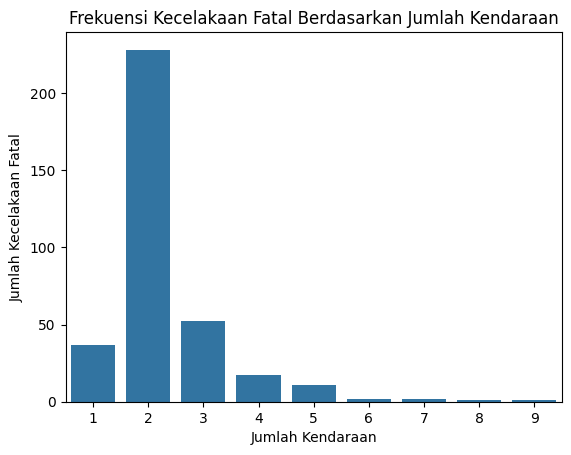

In [ ]:
# Konversi ke Pandas dan visualisasikan
import seaborn as sns
import matplotlib.pyplot as plt

# Fatal crash count by num_units
fatal_df = fatal_by_units.toPandas()
sns.barplot(data=fatal_df, x="num_units", y="fatal_crash_count")
plt.title("Frekuensi Kecelakaan Fatal Berdasarkan Jumlah Kendaraan")
plt.xlabel("Jumlah Kendaraan")
plt.ylabel("Jumlah Kecelakaan Fatal")
plt.xticks(rotation=0)
plt.show()


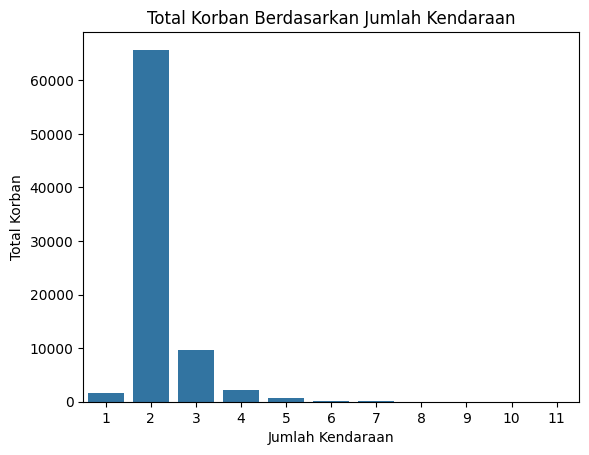

In [ ]:
# Total injuries by num_units
injury_df = victims_by_units.toPandas()
sns.barplot(data=injury_df, x="num_units", y="total_injuries")
plt.title("Total Korban Berdasarkan Jumlah Kendaraan")
plt.xlabel("Jumlah Kendaraan")
plt.ylabel("Total Korban")
plt.xticks(rotation=0)
plt.show()

In [ ]:
from pyspark.sql.functions import avg
# Total korban berdasarkan jumlah kendaraan
avg_victims_by_units = ta_2.groupBy("num_units") \
    .agg(avg("injuries_fatal").alias("fatal_injuries")) \
    .orderBy(col("fatal_injuries").desc())

avg_victims_by_units.show(5)

+---------+--------------------+
|num_units|      fatal_injuries|
+---------+--------------------+
|        9|  0.2222222222222222|
|        7|0.058823529411764705|
|        8|0.045454545454545456|
|        5| 0.03090507726269316|
|        6|0.014814814814814815|
+---------+--------------------+
only showing top 5 rows



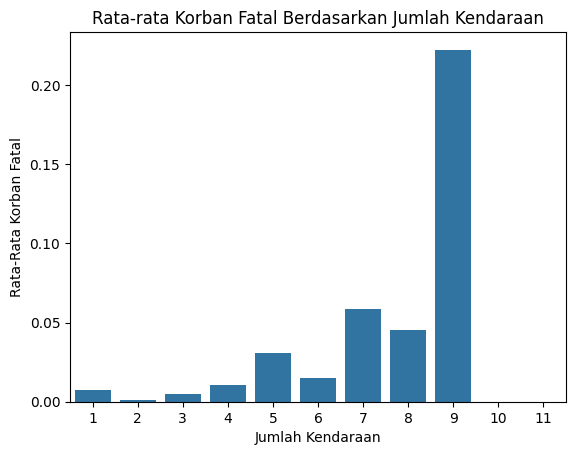

In [ ]:
# average fatal injuries by num_units
injury_df = avg_victims_by_units.toPandas()
sns.barplot(data=injury_df, x="num_units", y="fatal_injuries")
plt.title("Rata-rata Korban Fatal Berdasarkan Jumlah Kendaraan")
plt.xlabel("Jumlah Kendaraan")
plt.ylabel("Rata-Rata Korban Fatal")
plt.xticks(rotation=0)
plt.show()

Kesimpulan :
*   Dua kendaraan adalah skenario paling berisiko tinggi baik dari segi jumlah korban maupun frekuensi kecelakaan fatal.
*   Kecelakaan tunggal juga tergolong berbahaya dalam hal kematian, meskipun tidak sebanyak kecelakaan 2 kendaraan.
*   Kecelakaan yang melibatkan lebih banyak kendaraan cenderung lebih ringan, mungkin karena kecepatan relatif lebih rendah saat terjadi (misalnya di area padat atau lampu merah).


**REKOMENDASI**

**A. Fokus Pengawasan dan Pencegahan pada Interaksi 2 Kendaraan**
*   Pengawasan ketat di persimpangan dan zona rawan tabrakan dua arah.
*   Penerapan teknologi seperti kamera pemantau tabrakan (collision detection cameras) di titik rawan dua kendaraan bertemu.
*   Edukasi untuk menjaga jarak aman antar kendaraan dan hindari kebiasaan salip mendadak.

**B. Pencegahan Kecelakaan Kendaraan Tunggal**
*   Tambahkan pagar pengaman di tikungan tajam, turunan curam, dan tepi jalan yang berisiko.
*   Perbaiki pencahayaan malam dan rambu jalan agar lebih terlihat untuk mencegah tabrakan tunggal.
*   Pasang kamera kecepatan di ruas rawan ngebut atau kehilangan kendali.

**C. Antisipasi Kecelakaan Beruntun**
*   Terapkan sistem peringatan dini dan variable message signs saat terjadi kemacetan mendadak.
*   Kampanye keselamatan tentang respon cepat saat kecelakaan terjadi, agar kendaraan di belakang bisa menghindar dan tidak menambah tabrakan.

## Uncontrolled faktor yang mempengaruhi : weather condition

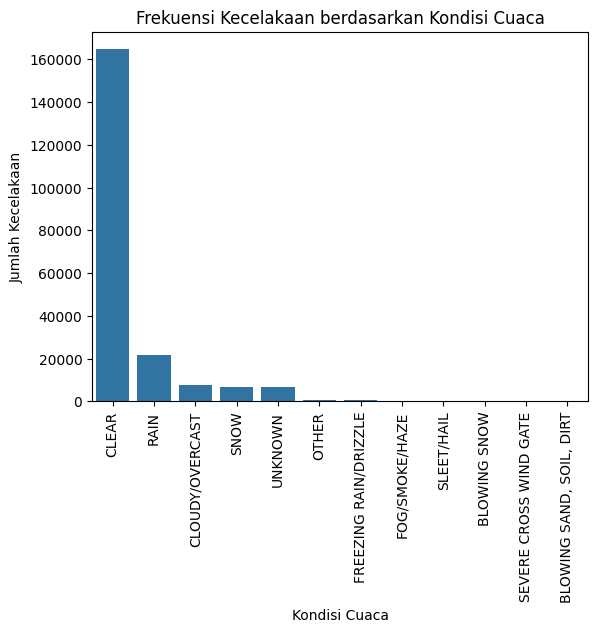

In [ ]:
# Kondisi jalan
weather_condition = ta_2.groupBy("weather_condition").agg(F.count("*").alias("crash_count")).orderBy(F.desc("crash_count"))
# Visualisasi
weather_condition_df = weather_condition.toPandas()
sns.barplot(data=weather_condition_df, x="weather_condition", y="crash_count")
plt.title("Frekuensi Kecelakaan berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Kecelakaan")
plt.xticks(rotation=90)
plt.show()

## Controlled faktor yang mempengaruhi

### traffic control

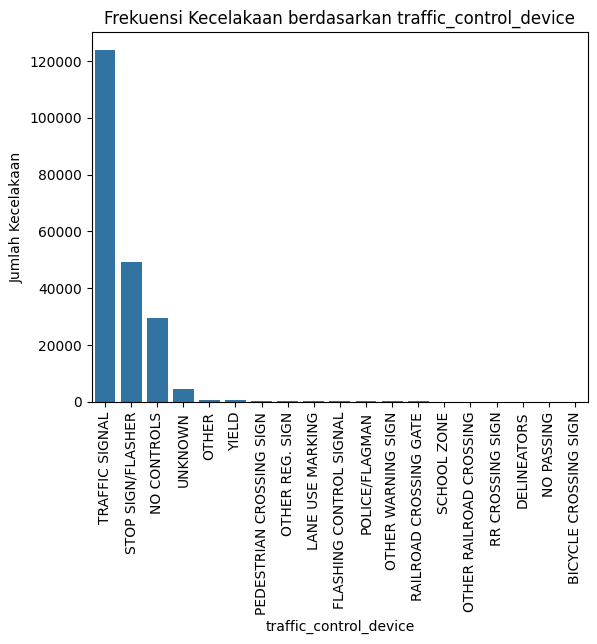

In [ ]:
# Kondisi jalan
traffic_control_device = ta_2.groupBy("traffic_control_device").agg(F.count("*").alias("crash_count")).orderBy(F.desc("crash_count"))
# Visualisasi
traffic_control_device_df = traffic_control_device.toPandas()
sns.barplot(data=traffic_control_device_df, x="traffic_control_device", y="crash_count")
plt.title("Frekuensi Kecelakaan berdasarkan traffic_control_device")
plt.xlabel("traffic_control_device")
plt.ylabel("Jumlah Kecelakaan")
plt.xticks(rotation=90)
plt.show()

### lighting condition

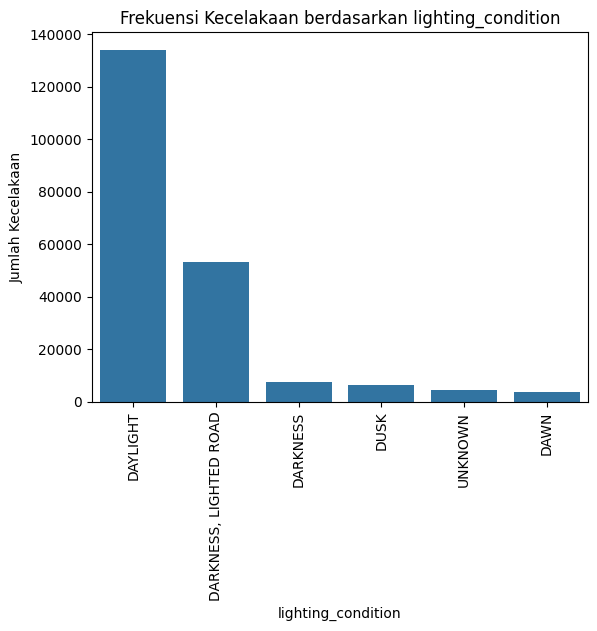

In [ ]:
# Kondisi jalan
lighting_condition = ta_2.groupBy("lighting_condition").agg(F.count("*").alias("crash_count")).orderBy(F.desc("crash_count"))
# Visualisasi
lighting_condition_df = lighting_condition.toPandas()
sns.barplot(data=lighting_condition_df, x="lighting_condition", y="crash_count")
plt.title("Frekuensi Kecelakaan berdasarkan lighting_condition")
plt.xlabel("lighting_condition")
plt.ylabel("Jumlah Kecelakaan")
plt.xticks(rotation=90)
plt.show()

In [ ]:
from pyspark.sql import functions as F

# Hitung jumlah kecelakaan berdasarkan lighting_condition
lighting_table = ta_2.groupBy("lighting_condition") \
    .agg(F.count("*").alias("jumlah_kecelakaan")) \
    .orderBy(F.desc("jumlah_kecelakaan"))

# Tampilkan dalam bentuk tabel
lighting_table.show()

### traffic way type

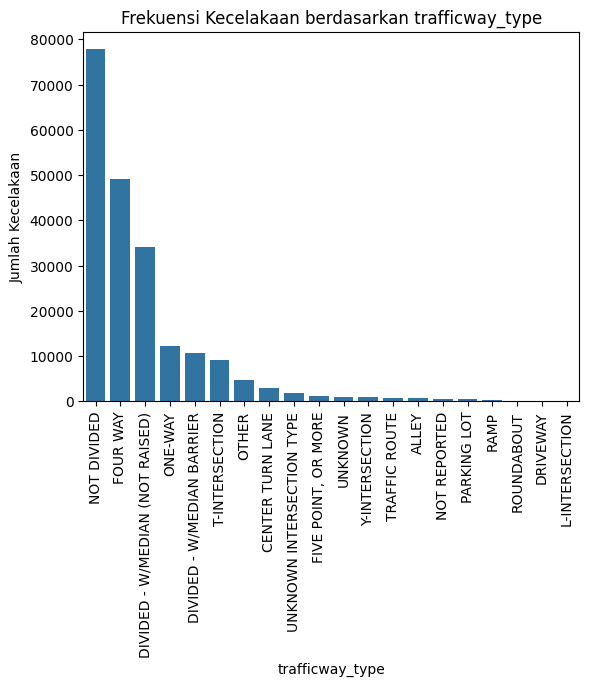

In [ ]:
# Kondisi jalan
trafficway_type = ta_2.groupBy("trafficway_type").agg(F.count("*").alias("crash_count")).orderBy(F.desc("crash_count"))
# Visualisasi
trafficway_type_df = trafficway_type.toPandas()
sns.barplot(data=trafficway_type_df, x="trafficway_type", y="crash_count")
plt.title("Frekuensi Kecelakaan berdasarkan trafficway_type")
plt.xlabel("trafficway_type")
plt.ylabel("Jumlah Kecelakaan")
plt.xticks(rotation=90)
plt.show()

### road surface

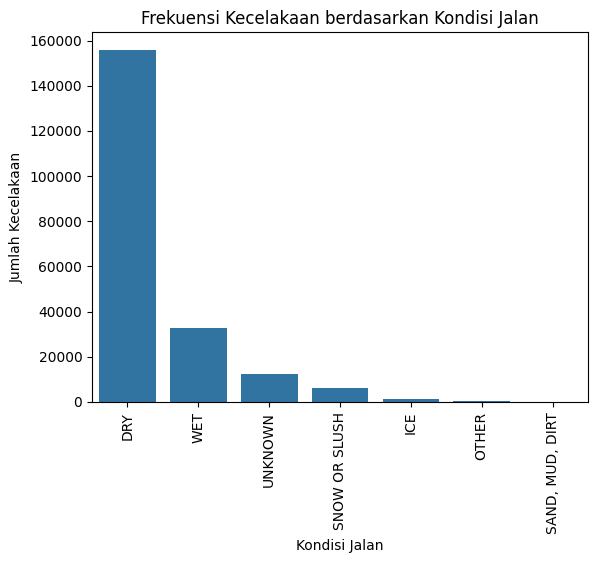

In [ ]:
# Kondisi jalan
road_condition = ta_2.groupBy("roadway_surface_cond").agg(F.count("*").alias("crash_count")).orderBy(F.desc("crash_count"))

# Visualisasi
road_condition_df = road_condition.toPandas()
sns.barplot(data=road_condition_df, x="roadway_surface_cond", y="crash_count")
plt.title("Frekuensi Kecelakaan berdasarkan Kondisi Jalan")
plt.xlabel("Kondisi Jalan")
plt.ylabel("Jumlah Kecelakaan")
plt.xticks(rotation=90)
plt.show()

In [ ]:
from pyspark.sql import functions as F

# Hitung jumlah kecelakaan berdasarkan traffic_way_type
traffic_way_table = ta_2.groupBy("trafficway_type") \
    .agg(F.count("*").alias("jumlah_kecelakaan")) \
    .orderBy(F.desc("jumlah_kecelakaan"))

# Tampilkan hasil dalam bentuk tabel (PySpark DataFrame)
traffic_way_table.show()


### road defect

In [ ]:
# Group by 'road_defect' and sum 'injuries_fatal'
df_result = ta_2.groupBy('road_defect').agg(
    F.sum('injuries_fatal').alias('fatal_injuries_count')
)

# Order by 'fatal_injuries_count' in descending order and get the top 10
df_top_10_pyspark = df_result.orderBy(F.desc('fatal_injuries_count')).limit(10)

# Convert to Pandas DataFrame
pandas_df_top_10 = df_top_10_pyspark.toPandas()

# Now, print or save 'pandas_df_top_10' and provide it to me.
# For example, you can print it:
# print(pandas_df_top_10)

In [ ]:
print(pandas_df_top_10)

         road_defect  fatal_injuries_count
0         NO DEFECTS                 326.0
1            UNKNOWN                  55.0
2       WORN SURFACE                   5.0
3              OTHER                   2.0
4    SHOULDER DEFECT                   1.0
5         RUT, HOLES                   0.0
6  DEBRIS ON ROADWAY                   0.0


In [ ]:
import pandas as pd
import altair as alt

def create_road_defect_fatal_injuries_chart(data_input):
    """
    Generates an Altair bar chart of fatal injuries count vs. road defect.

    Args:
        data_input (list of dict or pandas.DataFrame): The input data.
            If a list of dicts, it will be converted to a pandas DataFrame.
            Expected columns: 'road_defect' and 'fatal_injuries_count'.
    """

    if isinstance(data_input, list):
        pandas_df_top_10 = pd.DataFrame(data_input)
    elif isinstance(data_input, pd.DataFrame):
        pandas_df_top_10 = data_input
    else:
        raise ValueError("data_input must be a list of dictionaries or a pandas DataFrame.")

    # Create the bar chart
    chart = alt.Chart(pandas_df_top_10).mark_bar().encode(
        x=alt.X('road_defect', sort='-y', title='Road Defect'),
        y=alt.Y('fatal_injuries_count', title='Fatal Injuries Count'),
        tooltip=['road_defect', 'fatal_injuries_count']
    ).properties(
        title='Top Road Defects by Fatal Injuries Count'
    ).interactive()

    return chart

if __name__ == '__main__':
    # This is a sample of how you would use the function with your data
    # In a Google Colab environment, you would typically load your data from
    # a PySpark DataFrame first, convert it to Pandas, and then pass it here.

    # Example data (replace this with your actual pandas_df_top_10 after PySpark processing)
    sample_data = [
        {'road_defect': 'NO DEFECTS', 'fatal_injuries_count': 326.0},
        {'road_defect': 'UNKNOWN', 'fatal_injuries_count': 55.0},
        {'road_defect': 'WORN SURFACE', 'fatal_injuries_count': 5.0},
        {'road_defect': 'OTHER', 'fatal_injuries_count': 2.0},
        {'road_defect': 'SHOULDER DEFECT', 'fatal_injuries_count': 1.0},
        {'road_defect': 'RUT, HOLES', 'fatal_injuries_count': 0.0},
        {'road_defect': 'DEBRIS ON ROADWAY', 'fatal_injuries_count': 0.0}
    ]

    # Create the chart
    fatal_injuries_chart = create_road_defect_fatal_injuries_chart(sample_data)

    # Display the chart (this will work in Colab)
    fatal_injuries_chart.display()

    # To save the chart to a file (optional)
    # fatal_injuries_chart.save('top_road_defects_fatal_injuries.html')
    # fatal_injuries_chart.save('top_road_defects_fatal_injuries.json')

alt.Chart(...)

### intersection related

In [ ]:
ta_2.select('intersection_related_i').distinct().show()

+----------------------+
|intersection_related_i|
+----------------------+
|                     Y|
|                     N|
+----------------------+



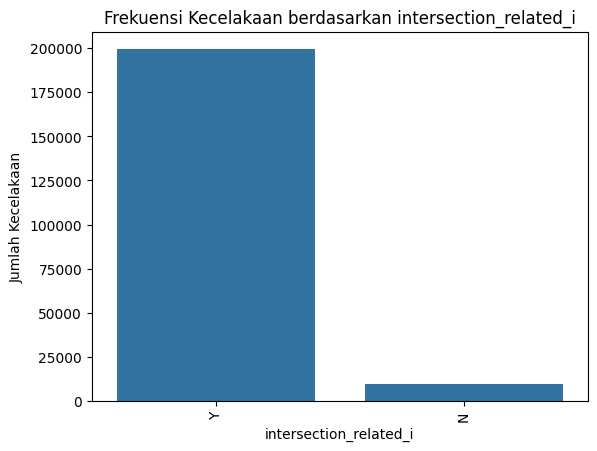

In [54]:
# Kondisi jalan
intersection_related_i = ta_2.groupBy("intersection_related_i").agg(F.count("*").alias("crash_count")).orderBy(F.desc("crash_count"))
# Visualisasi
intersection_related_i_df = intersection_related_i.toPandas()
sns.barplot(data=intersection_related_i_df, x="intersection_related_i", y="crash_count")
plt.title("Frekuensi Kecelakaan berdasarkan intersection_related_i")
plt.xlabel("intersection_related_i")
plt.ylabel("Jumlah Kecelakaan")
plt.xticks(rotation=90)
plt.show()

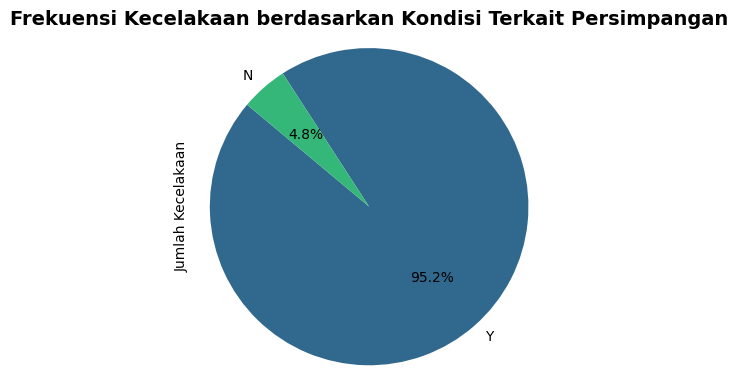

In [56]:
# Visualisasi (Visualization) - Pie Chart
plt.figure(figsize=(4, 4))  # Adjust figure size for a better pie chart
plt.pie(
    intersection_related_i_df["crash_count"],
    labels=intersection_related_i_df["intersection_related_i"],
    autopct="%1.1f%%",  # Display percentages on the pie chart
    startangle=140,      # Rotate the start of the pie for better aesthetics
    colors=sns.color_palette("viridis", n_colors=len(intersection_related_i_df)), # Use a color palette
)
plt.title("Frekuensi Kecelakaan berdasarkan Kondisi Terkait Persimpangan", fontsize=14, fontweight='bold')
plt.ylabel("Jumlah Kecelakaan") # Keep the y-axis label for context
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()